<AxesSubplot:>

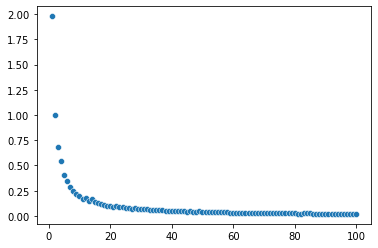

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

n_samples = 1000
variance = np.zeros(100)
for i in range(1, 101):
    samples = np.random.randint(1, 6, size=(n_samples, i))
    mean = np.mean(samples, axis=1)
    variance[i-1] = np.var(mean)

sns.scatterplot(np.arange(1, 101), variance)

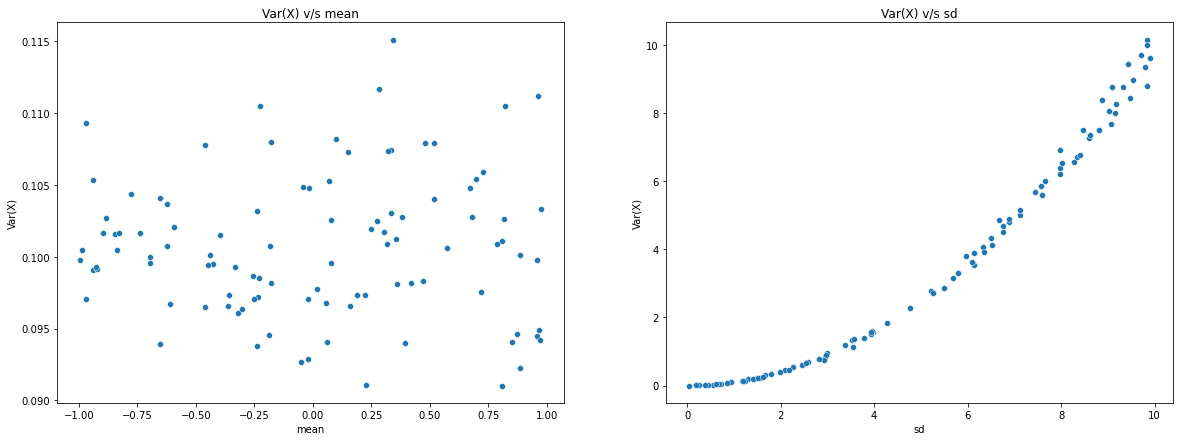

In [2]:
size = 100

variance_variable_mean = np.zeros(size+1)
variance_variable_sd = np.zeros(size+1)

var_mean_range = np.random.uniform(-1, 1, size+1)
var_sd_range = np.random.uniform(0, 10, size+1)

for id, i in enumerate(var_mean_range):
    # samples for variable mean and fixed sd
    samples_variable_mean = np.random.normal(loc=i, scale=1.0, size=(1000, 10))
    mean_variable_mean = np.mean(samples_variable_mean, axis=1)
    variance_variable_mean[id] = np.var(mean_variable_mean)

for id, i in enumerate(var_sd_range):
    # samples for fixed mean and variable sd
    samples_variable_sd = np.random.normal(loc=0.0, scale=i, size=(1000, 10))
    mean_variable_sd = np.mean(samples_variable_sd, axis=1)
    variance_variable_sd[id] = np.var(mean_variable_sd)

fig, axs = plt.subplots(figsize=(20, 7), ncols=2)

sns.scatterplot(var_mean_range, variance_variable_mean, ax=axs[0])
axs[0].title.set_text('Var(X) v/s mean')
axs[0].set_xlabel('mean')
axs[0].set_ylabel('Var(X)')

sns.scatterplot(var_sd_range, variance_variable_sd, ax=axs[1])
axs[1].title.set_text('Var(X) v/s sd')
axs[1].set_xlabel('sd')
axs[1].set_ylabel('Var(X)')

fig.show()

In [3]:
from scipy.stats import norm
from math import sqrt

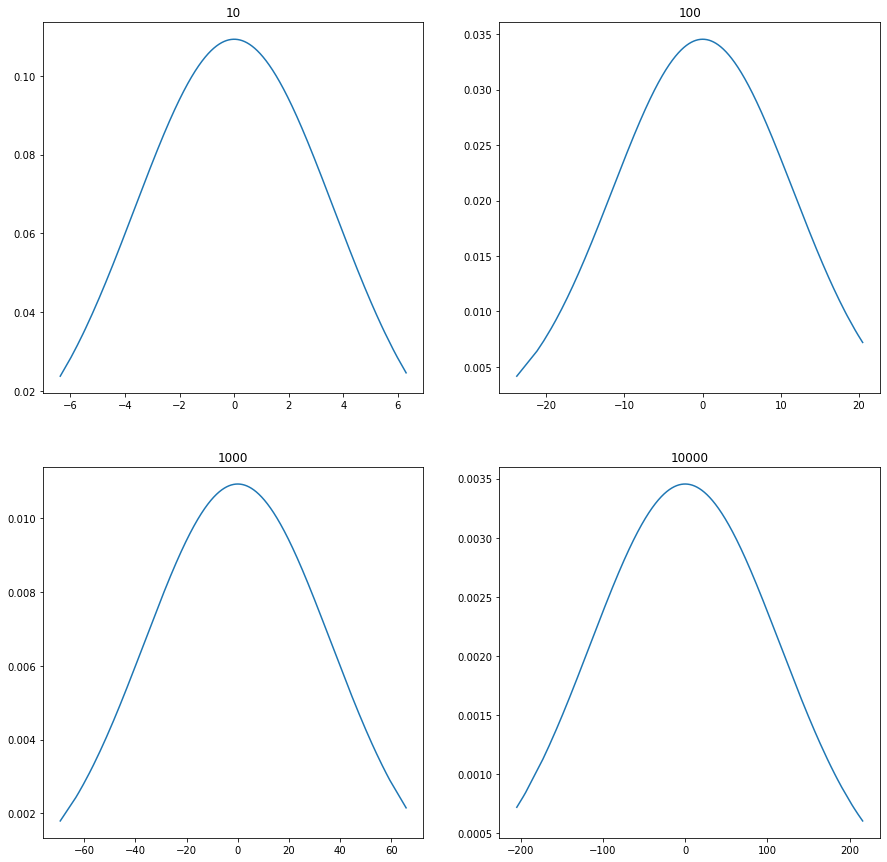

In [4]:
n = np.array([10, 100, 1000, 10000])
D_sum = np.empty(shape=(0, 0))

for size_idx in np.arange(n.shape[0]):
    D = np.random.uniform(-1, 1, size=(10000, n[size_idx]))
    if size_idx == 0:
        D_sum = np.sum(D, axis=1)
    else:
        D_sum = np.vstack([D_sum, np.sum(D, axis=1)])    

fig, axs = plt.subplots(figsize=(15, 15), nrows=2, ncols=2)
counter = 0
for i in np.arange(2):
    for j in np.arange(2):
        sns.lineplot(x=D_sum[counter,:], y=norm.pdf(D_sum[counter,:], (n[counter]*(-2+2)/2), (sqrt( ( (-2-2)**2)/12) )*sqrt(n[counter])), ax=axs[i, j])
        axs[i, j].set_title(f'{n[counter]}')
        counter += 1

# Chi Square test

### Using dice throw example (Discrete sample example)

#### We know that the population mean of dice throws will be:
### $\frac{\sum_{i=1}^6 i}{6}$
Hence, $\mu$ = 3.5

#### We also know that Standard Deviation will be:
### $\sqrt{\frac{\sum_{i=1}^6(x_i - \mu)}{6-1}}$
Hence, $\sigma$ = 1.707825127659933

In [5]:
pop_mean = 3.5
pop_std = 1.707825127659933
pop_var = pop_std**2

In [6]:
samples = np.random.randint(1, 6+1, size=(1000, 3))
print(samples[:10])
samples.shape

[[1 6 2]
 [6 6 6]
 [3 5 2]
 [5 3 5]
 [4 2 4]
 [3 2 5]
 [2 2 5]
 [6 2 4]
 [5 4 5]
 [6 3 3]]


(1000, 3)

In [7]:
sample_mean_dist = np.mean(samples, axis=1)
sample_var_dist = np.var(samples, axis=1)
sample_std_dist = sample_var_dist**0.5

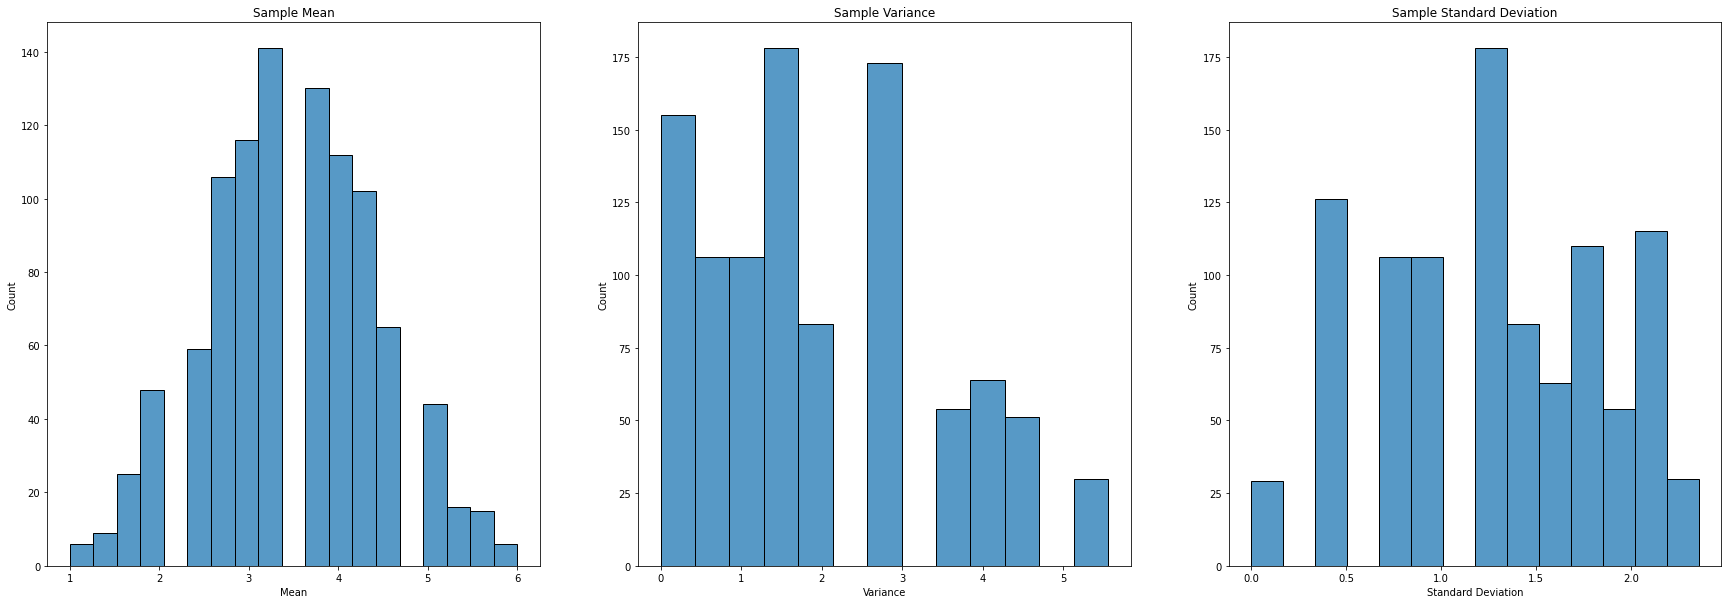

In [19]:
%matplotlib inline
fig, axs = plt.subplots(figsize=(30, 10), ncols=3)
sns.histplot(x=sample_mean_dist, ax=axs[0])
axs[0].set_title('Sample Mean')
axs[0].set_xlabel('Mean')
sns.histplot(x=sample_var_dist, ax=axs[1])
axs[1].set_title('Sample Variance')
axs[1].set_xlabel('Variance')
sns.histplot(x=sample_std_dist, ax=axs[2])
axs[2].set_title('Sample Standard Deviation')
axs[2].set_xlabel('Standard Deviation');

From *Central Limit Theorem*, we already knew that the sample means distribution will be a **Normal Distribution**
<br>Now, We have to gain insights about the ***sample variance distribution*** 
<br><br>
#### But, first lets see the whether the below given relation  holds or not: 
$E[S^2] = \sigma^2$

In [9]:
expected_sample_variance = np.mean(sample_var_dist)
expected_sample_variance

1.9884444444444442

In [10]:
pop_var

2.9166666666666665

Now, lets look at at the observations:
* $\sigma^2$ - $E[S^2]$ > 0
* $E[S^2]$ < $\sigma^2$

<br>But,we cannot say for sure since we tried this using only 1000 samples.<br>Let's, try this using $10^6$ samples.

In [11]:
large_samples = np.random.randint(1, 6+1, size=(10**6, 3))
print(large_samples[:10])
large_samples.shape 

[[1 3 3]
 [2 1 2]
 [2 2 5]
 [3 2 6]
 [1 3 4]
 [2 3 3]
 [3 2 4]
 [5 5 5]
 [1 3 3]
 [1 4 1]]


(1000000, 3)

In [12]:
large_sample_mean_dist = np.mean(large_samples, axis=1)
large_sample_var_dist = np.var(large_samples, axis=1)
large_sample_std_dist = large_sample_var_dist**0.5

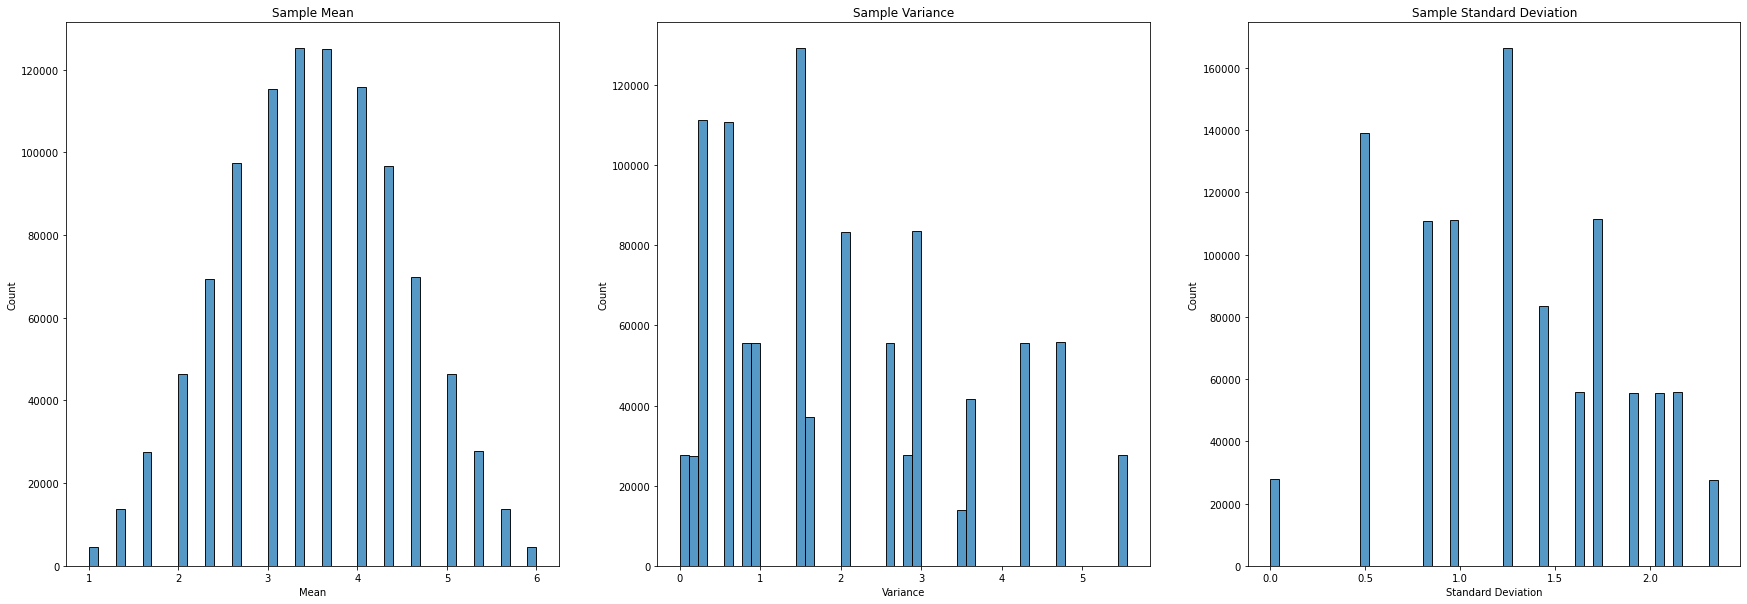

In [20]:
%matplotlib inline
fig, axs = plt.subplots(figsize=(30, 10), ncols=3)
sns.histplot(x=large_sample_mean_dist, ax=axs[0], bins=50)
axs[0].set_title('Sample Mean')
axs[0].set_xlabel('Mean')
sns.histplot(x=large_sample_var_dist, ax=axs[1], bins=50)
axs[1].set_title('Sample Variance')
axs[1].set_xlabel('Variance')
sns.histplot(x=large_sample_std_dist, ax=axs[2], bins=50)
axs[2].set_title('Sample Standard Deviation')
axs[2].set_xlabel('Standard Deviation');

In [24]:
expected_large_sample_var = np.mean(large_sample_var_dist)
expected_large_sample_var

1.9456977777777775

As we can see, there is very slight change in $E(S^2)$. Hence, our previous observations stands true.
* $\sigma^2$ - $E[S^2]$ > 0
* $E[S^2]$ < $\sigma^2$

### Random samples from standard normal dist. (Continous sample example) 

Since, it is a standard normal distribution, we know that:
<br>
$\mu=0$
<br>
$\sigma=1$

In [16]:
norm_samples = np.random.normal(size=(10**6, 3))
print(norm_samples[:10])
norm_samples.shape

[[ 0.51419651 -0.15048863  1.42711892]
 [ 0.55275262 -0.69712584  0.06016529]
 [ 0.53070175  0.52532741  0.30219801]
 [-0.16287308 -1.63886489 -0.98008161]
 [ 0.8419302  -1.15178817  1.72256787]
 [-0.36781897  0.37790447  0.02071061]
 [ 0.06001394 -2.12044509 -0.17495044]
 [ 1.1285591   0.71370479  0.03079234]
 [-0.14180303  0.0894868   0.28548243]
 [-0.76440051  1.26965533  1.03879412]]


(1000000, 3)

In [17]:
norm_sample_mean_dist = np.mean(norm_samples, axis=1)
norm_sample_var_dist = np.var(norm_samples, axis=1)
norm_sample_std_dist = norm_sample_var_dist**0.5

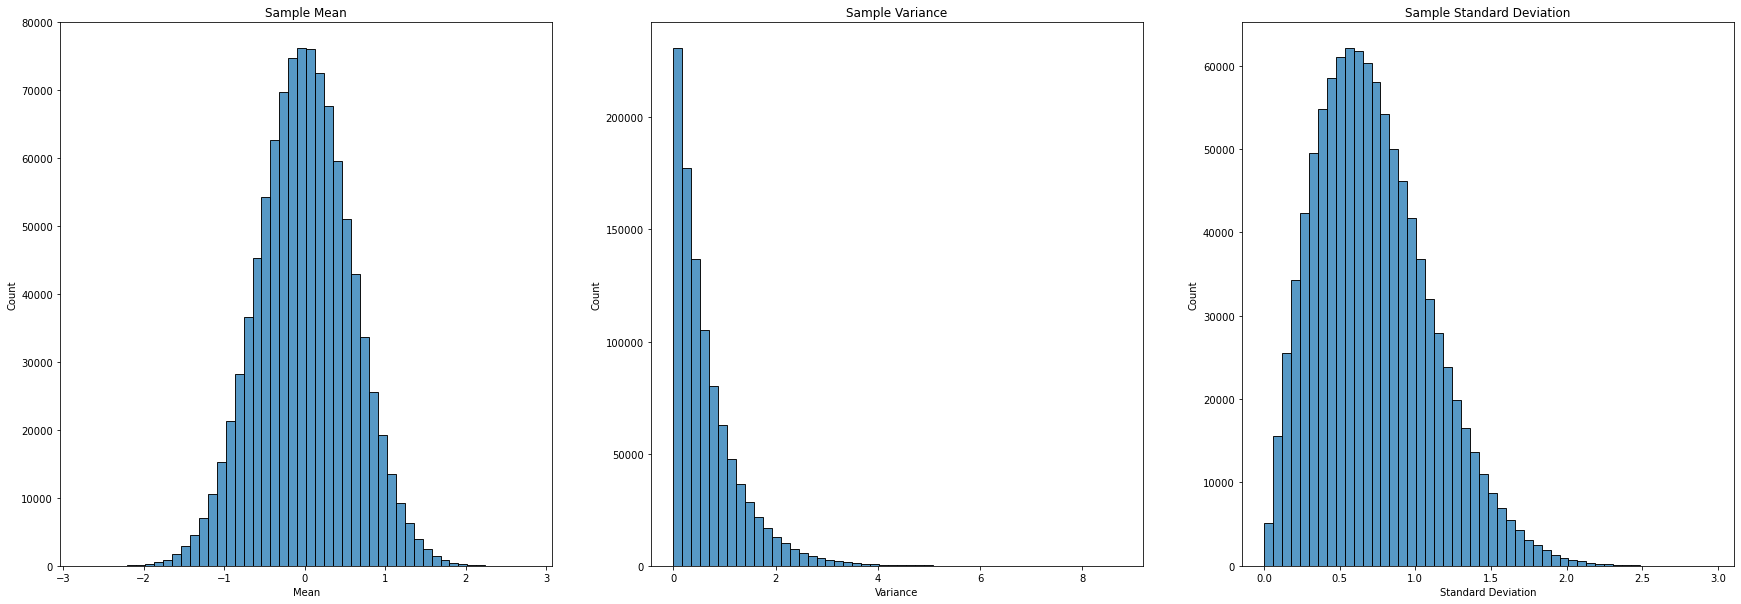

In [21]:
%matplotlib inline
fig, axs = plt.subplots(figsize=(30, 10), ncols=3)
sns.histplot(x=norm_sample_mean_dist, ax=axs[0], bins=50)
axs[0].set_title('Sample Mean')
axs[0].set_xlabel('Mean')
sns.histplot(x=norm_sample_var_dist, ax=axs[1], bins=50)
axs[1].set_title('Sample Variance')
axs[1].set_xlabel('Variance');
sns.histplot(x=norm_sample_std_dist, ax=axs[2], bins=50)
axs[2].set_title('Sample Standard Deviation')
axs[2].set_xlabel('Standard Deviation');


In [23]:
expected_norm_sample_var = np.mean(norm_sample_var_dist)
expected_norm_sample_var

0.6667804125752259

#### Even while using normal distribution we can see that the oberservations made using samples containing discrete values hold true:
* $\sigma^2$ - $E[S^2]$ > 0
* $E[S^2]$ < $\sigma^2$ 

### Now, lets play with two value:
* $n$ = sample size
* $\mu$ = population mean

We will plot a graph for each $v/s$ $E(S^2)$
<br>
and compare with $\sigma^2$

### For $n$:
* $\mu$ = 0
* $\sigma$ = 1

In [30]:
import pandas as pd

In [51]:
variable_n = np.arange(1, 50)
variable_n

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [52]:
variable_n_expected_var_series = pd.Series(index=variable_n)

In [60]:
for n in variable_n:
    variable_n_samples = np.random.normal(size=(10**6, n))
    variable_n_var_dist = np.var(variable_n_samples, axis=1)
    variable_n_expected_var_series[n] = np.mean(variable_n_var_dist)

variable_n_expected_var_series.iloc[:5]

1    0.000000
2    0.499155
3    0.666130
4    0.750221
5    0.799598
dtype: float64

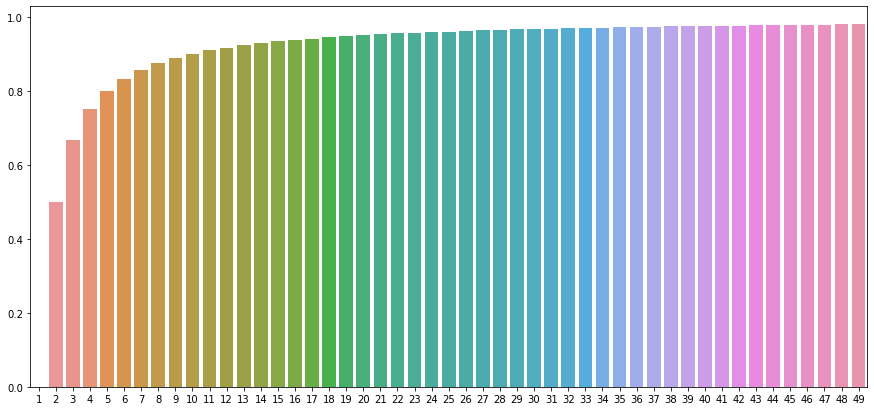

In [61]:
fig, axs = plt.subplots(figsize=(15, 7))
sns.barplot(x=variable_n, y=variable_n_expected_var_series.values);

We can see that as we increase $n$, $E(S^2)$ is getting closer to $\sigma^2$ which is equal to 1.

### For $\mu$:
* $n$ = 3
* $\sigma$ = 1

In [58]:
n = 3

In [55]:
variable_mean = np.random.uniform(-10, 10+1, size=50)
variable_mean

array([ 2.46976978,  2.94054933, -3.0620342 , -0.68291682, -6.46820694,
       10.82883847,  6.50198688,  4.57082467, -7.78651462,  2.67923303,
        3.34749019, -9.24891863, -6.40420611,  2.82752854, -8.06928254,
        0.37964512, -9.62707637,  1.98188659,  4.26388595, -1.05213448,
        9.39261052, -6.69814683,  3.26150655,  2.19043759,  4.14669453,
       -5.80912183, -9.30226082,  8.24346751, -3.89732452, -4.92295879,
       -0.98445846, -0.37365344,  2.65202933, -3.05075071,  0.77732635,
        9.0693857 ,  4.59796606,  6.96377349,  2.29976949,  4.62285432,
        4.51657209, -1.35368676, -5.67357437,  3.98601889,  5.36876147,
       -7.57534752,  3.05539364,  9.27397164,  0.7287591 , -0.69466785])

In [57]:
variable_mean_expected_var_series = pd.Series(index=variable_mean)

In [62]:
for mean in variable_mean:
    variable_mean_samples = np.random.normal(loc=mean, size=(10**6, n))
    variable_mean_var_dist = np.var(variable_mean_samples, axis=1)
    variable_mean_expected_var_series[mean] = np.mean(variable_mean_var_dist)

variable_mean_expected_var_series.iloc[:5]

 2.469770    0.979392
 2.940549    0.979536
-3.062034    0.980279
-0.682917    0.979955
-6.468207    0.979483
dtype: float64